**Objective** : The objective of this project is to study employee performance across different departments, uncover the top factors affecting performance, and develop a machine learning model that can accurately predict employee performance for decision-making and talent optimization.

In [223]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [224]:
employee_df = pd.read_excel('INX_Future_Inc_Employee_Performance.xlsx')
employee_df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [225]:
employee_df.shape

(1200, 28)

In [226]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [227]:
employee_df['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [228]:
employee_df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [229]:
employee_df.describe(include='O')

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [230]:
emp_cat_cols = employee_df.describe(include ='O').columns
emp_num_cols = employee_df.describe(exclude ='O').columns
print("cat_cols:", emp_cat_cols)
print("num_cols:", emp_num_cols)

cat_cols: Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')
num_cols: Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')


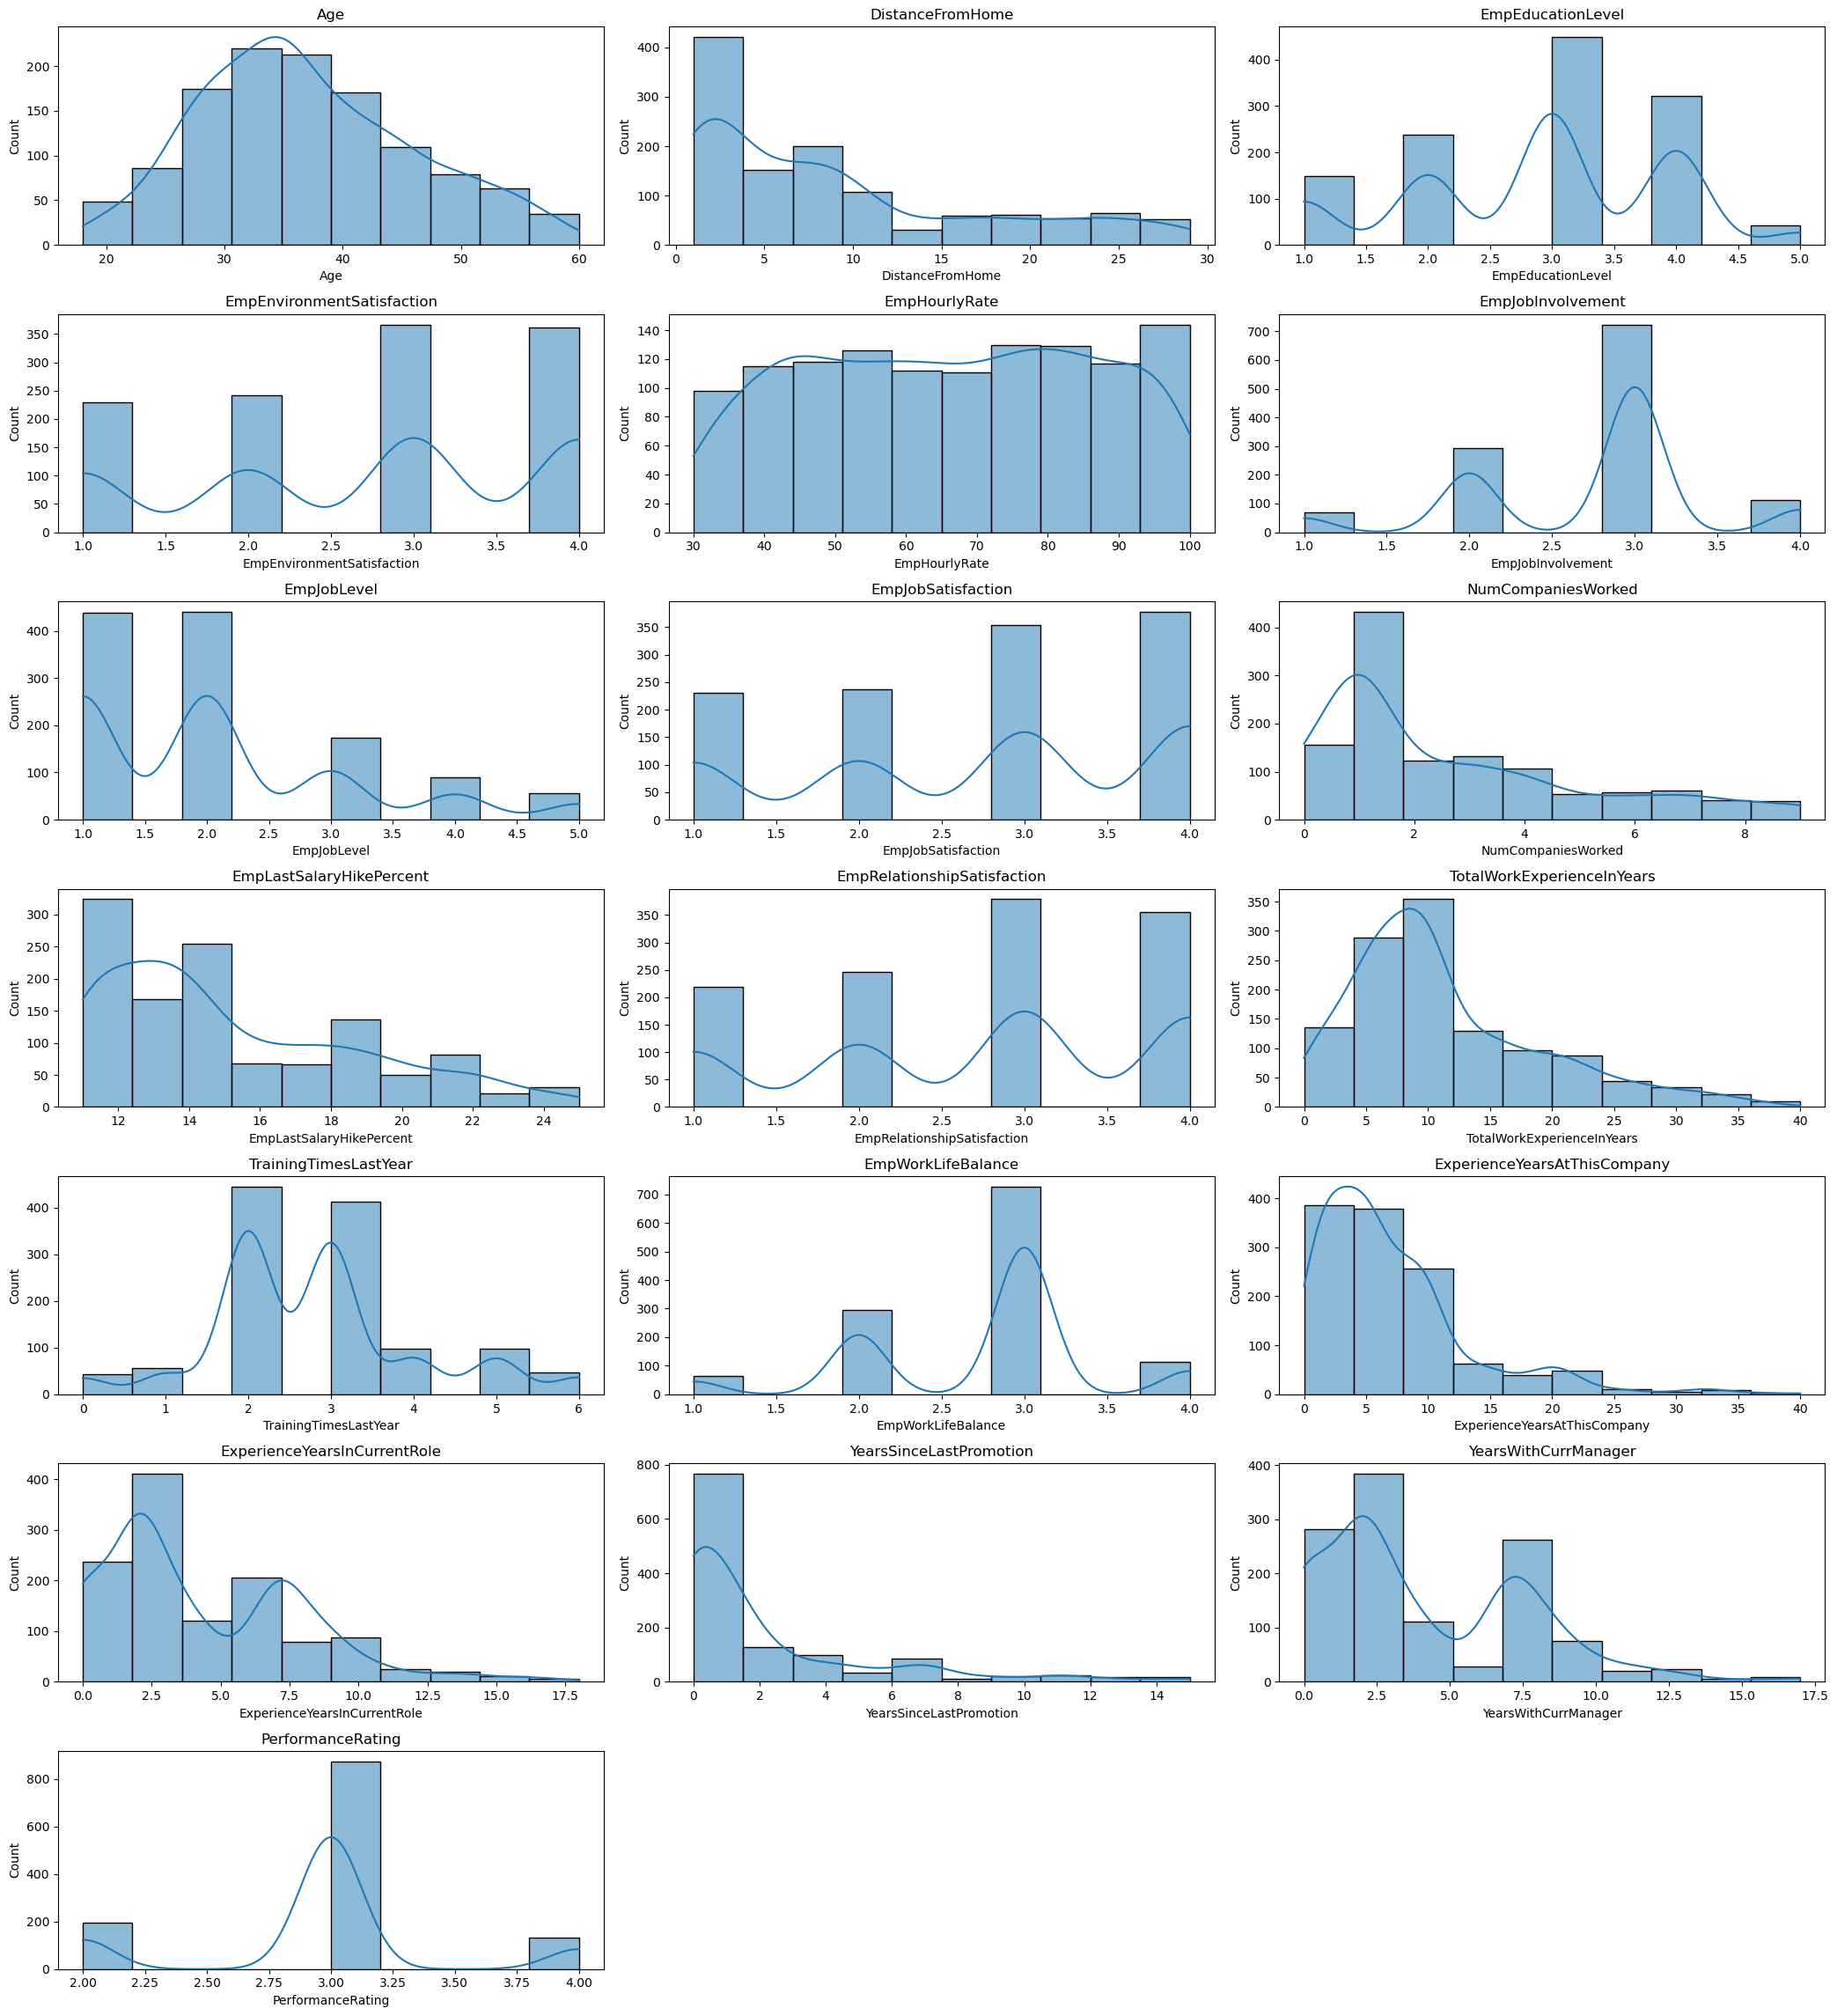

In [231]:
plt.figure(figsize=(21,23))
pos = 1
for i in emp_num_cols:
   plt.subplot(7,3,pos)
   sns.histplot(employee_df[i], bins=10, kde=True)
   pos=pos+1
   plt.title(i)
        
plt.tight_layout()

Insights(numereic Data):

- Age: Employees are mostly between 30–40 years, indicating a mid-career workforce.
- DistanceFromHome: Most employees live very close to the office (0–5 km), meaning distance is not a major stress factor for most.
- EmpEducationLevel: Education level 3 (Bachelor’s equivalent) is the most common among employees.
- EmpEnvironmentSatisfaction: Satisfaction levels are fairly evenly distributed, but levels 2(Medium) and 4(Very High)slightly dominate.
- EmpHourlyRate: Hourly rates are well distributed, showing no major skew or unusual outliers.
- EmpJobInvolvement: Most employees have involvement level 3, indicating generally good engagement.
- EmpJobLevel: Job levels 1 and 2 dominate, showing that many employees are early-career or mid-level.
- EmpJobSatisfaction: Job satisfaction levels are evenly distributed with slight peaks at levels 3 and 4.
- NumCompaniesWorked: Most employees worked at 1–2 companies before, indicating moderate job stability.
- EmpLastSalaryHikePercent: Most salary hikes fall between 11–15%, indicating standard HR compensation practice.
- EmpRelationshipSatisfaction: Relationship satisfaction with managers is evenly spread, showing no single dominant trend.
- TotalWorkExperienceInYears: Most employees have 5–10 years of experience, indicating a moderately experienced workforce.
- TrainingTimesLastYear: Most employees underwent 2–3 training sessions, indicating moderate learning engagement.
- EmpWorkLifeBalance: Work-life balance rating 3 is the most common, suggesting generally better balance.
- ExperienceYearsAtThisCompany: Most employees have 3–8 years at the company, showing good retention.
- ExperienceYearsInCurrentRole: Employees usually stay 2–6 years in the same role before moving.
- YearsSinceLastPromotion: Most employees received their last promotion within 0–2 years, showing active promotion cycles.
- YearsWithCurrManager: A majority have been with their current manager for 2–4 years, indicating moderate reporting stability.
- PerformanceRating: The majority of employees fall under performance rating 3 ('Excellent').

In [232]:
#EmpNumber: This is a unique identifier for each employee and does not carry analytical value; hence excludeding from modeling.
emp_cat_cols = employee_df.select_dtypes(include=['object']).columns.tolist()
emp_cat_cols.remove('EmpNumber')

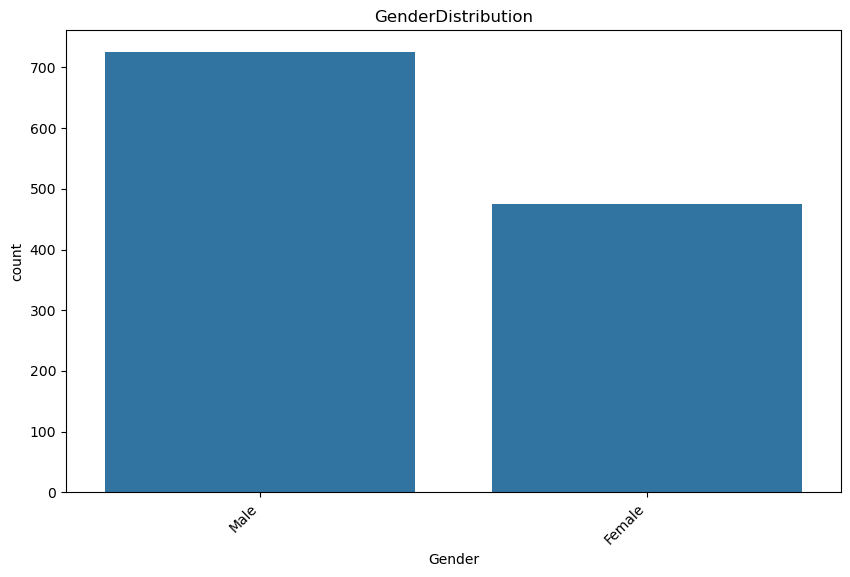

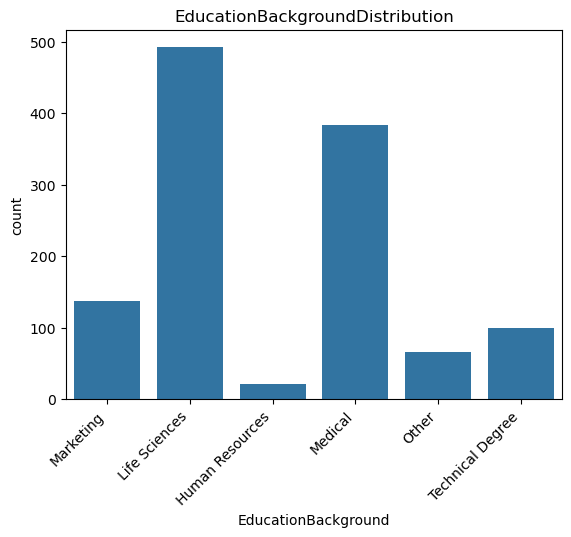

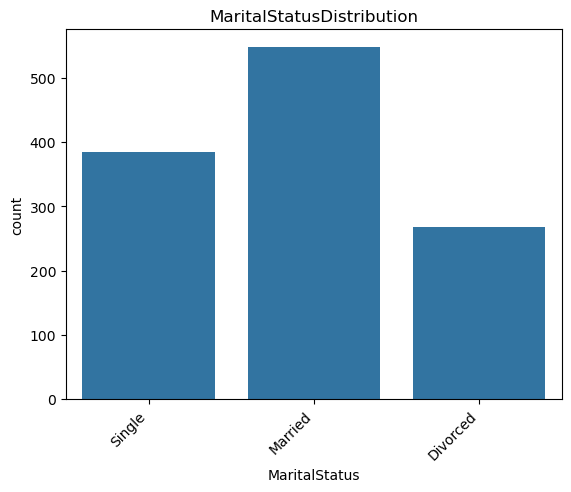

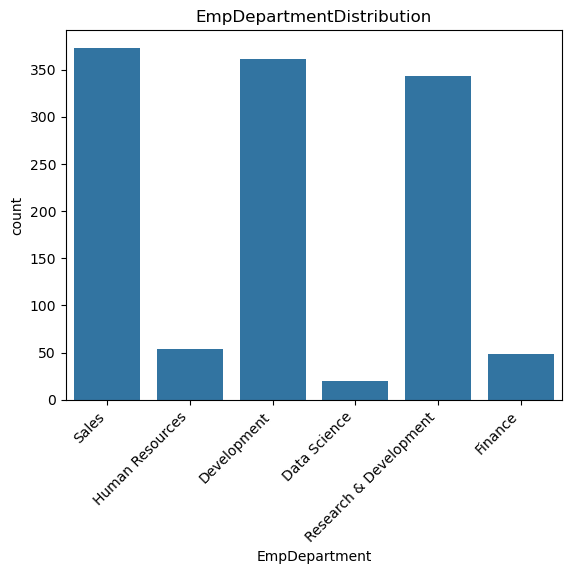

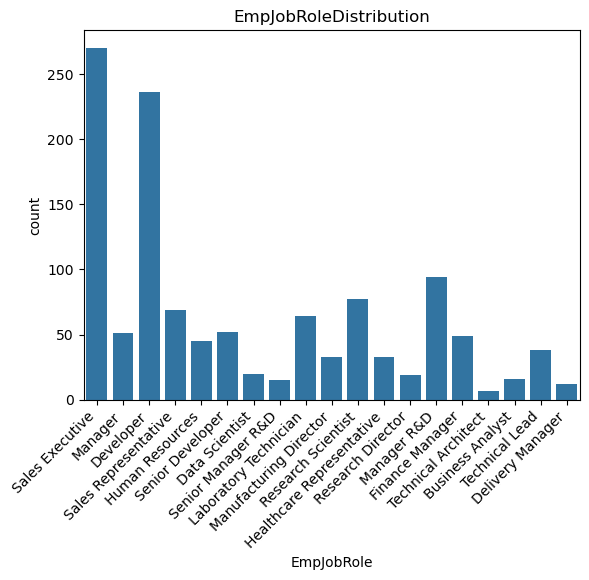

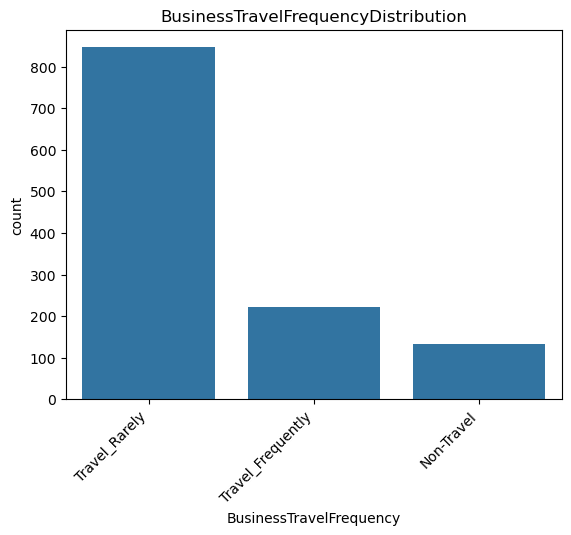

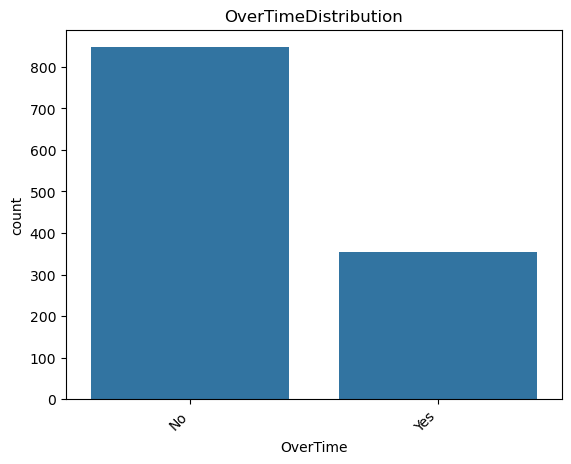

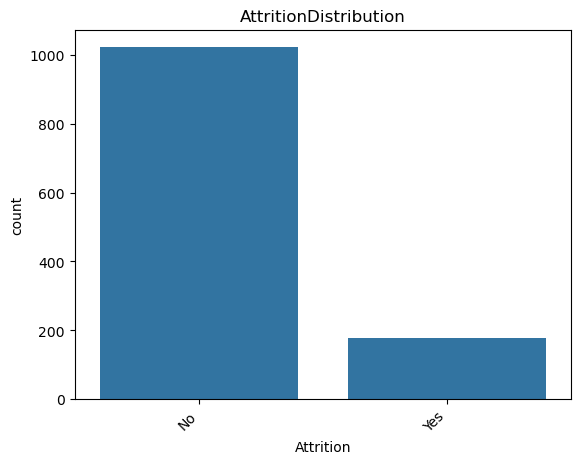

In [233]:
plt.figure(figsize=(10,6))
for i in emp_cat_cols:
    sns.countplot(x=employee_df[i], data=employee_df)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(i+'Distribution')
    plt.show()

Insights(categorical Data):
- Gender: More males than females work in the company.
- EducationBackground: Life Sciences and Medical dominate educational backgrounds.
- MaritalStatus: Married employees form the highest proportion.
- EmpDepartment: Sales, Development, and R&D have the most employees.
- EmpJobRole: Sales Executives and Research Scientists are the most common roles.
- BusinessTravelFrequency: Most employees travel rarely.
- OverTime: Majority of employees do not work overtime.
- Attrition: Very few employees have left the company (low attrition).

**PerformanceRating vs Categorical features**

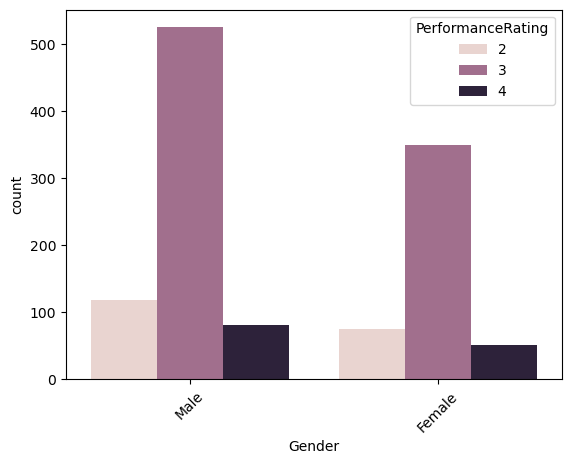

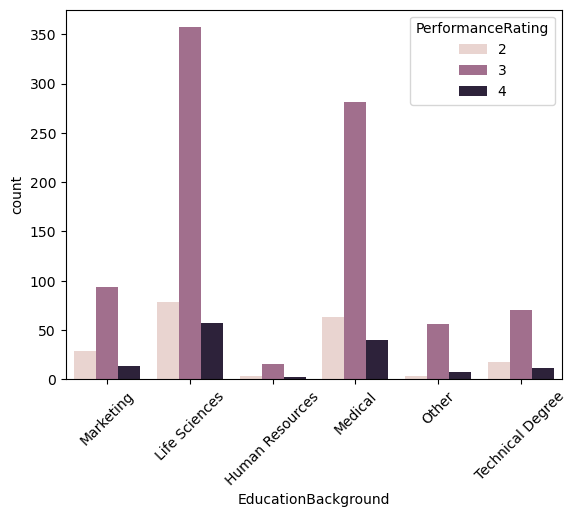

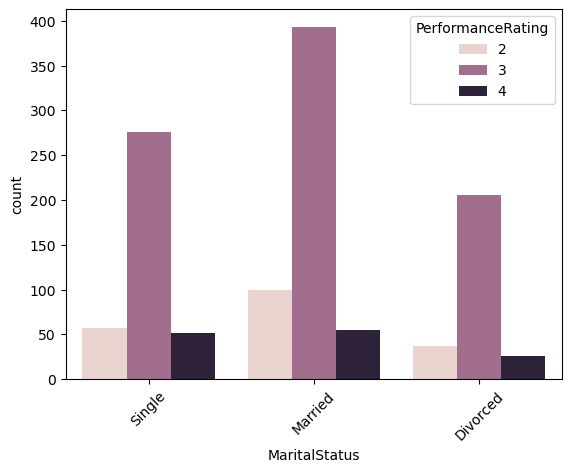

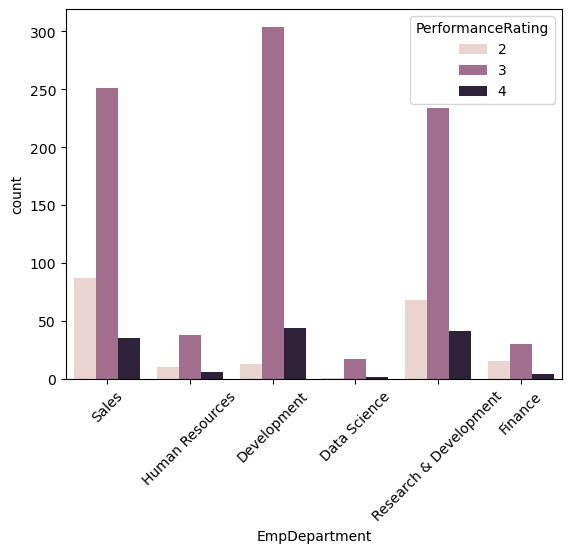

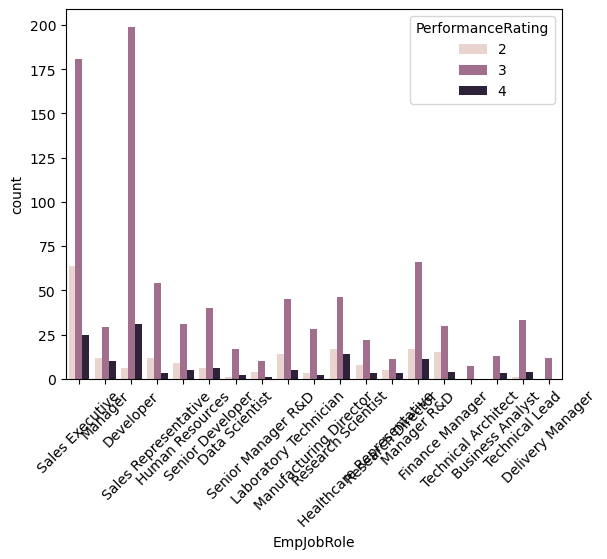

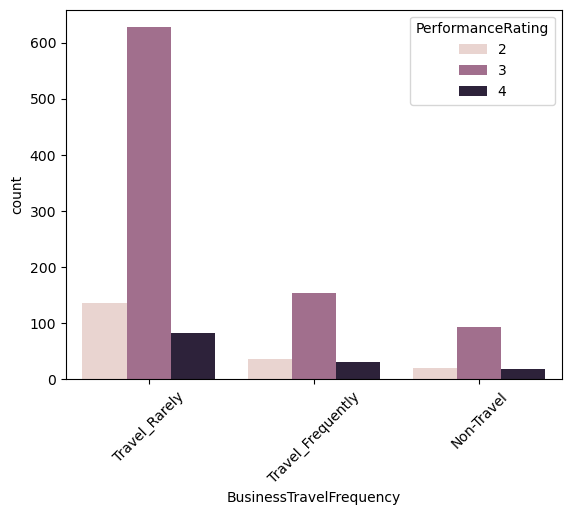

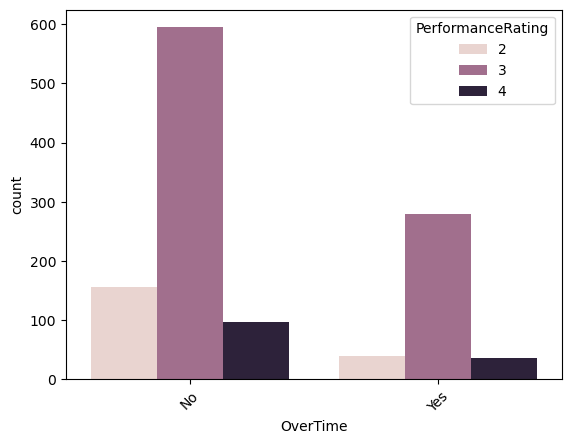

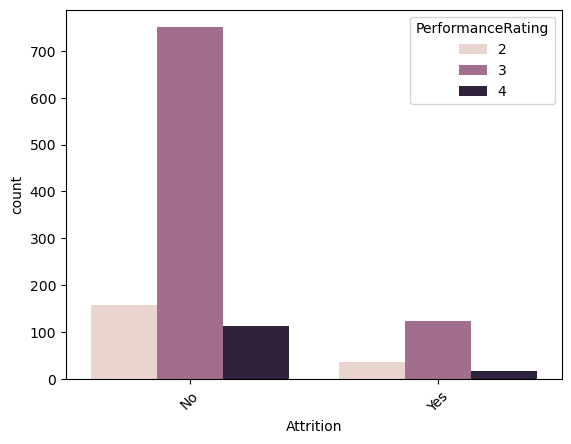

In [234]:
for col in emp_cat_cols:
    sns.countplot(x=col, hue='PerformanceRating', data=employee_df)
    plt.xticks(rotation=45)
    plt.show()

Insights(Categorical Data):
- Gender: Performance distribution is similar for both males and females.
- EducationBackground: Life Sciences and Medical dominate all performance categories; performance is not strongly tied to education stream.
- MaritalStatus: Married employees form the highest proportion of each performance rating.
- EmpDepartment: Sales, Development, and R&D have the highest counts across performance levels.
- EmpJobRole: Sales Executives and Research Scientists dominate all rating groups due to their large numbers.
- BusinessTravelFrequency: Employees who travel rarely show the highest performance counts.
- OverTime: Employees who do not work overtime dominate all performance categories.
- Attrition: Employees who stay with the company have higher representation across performance levels.

**PerformanceRating vs Numerical features**

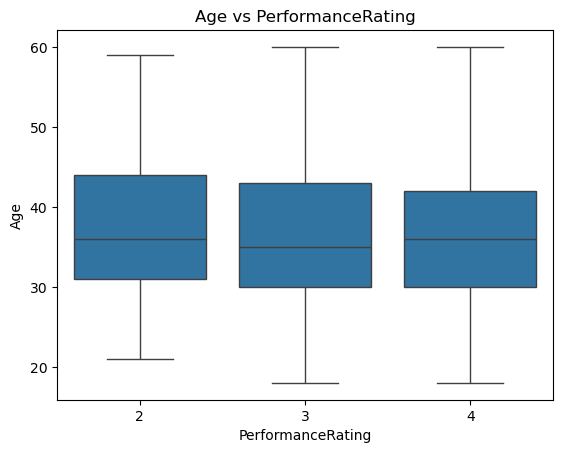

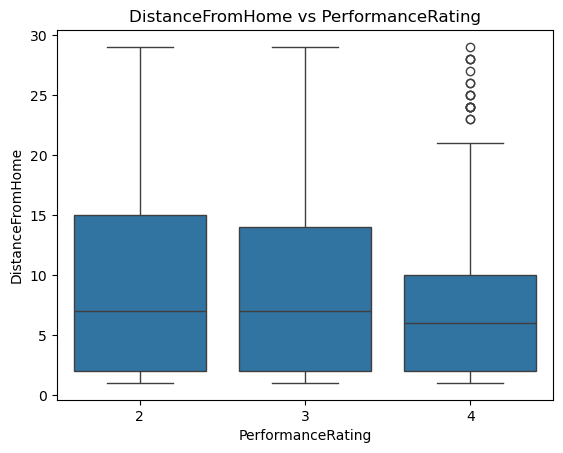

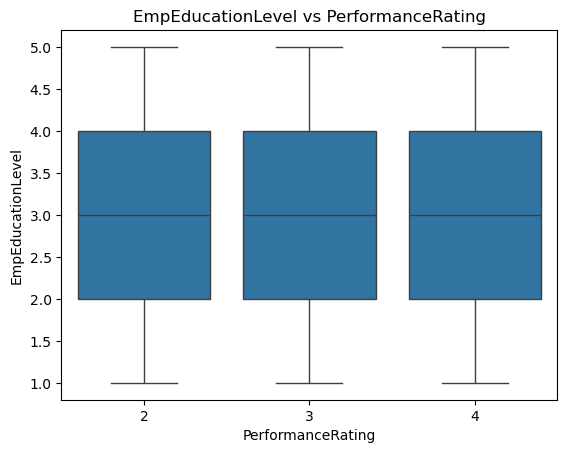

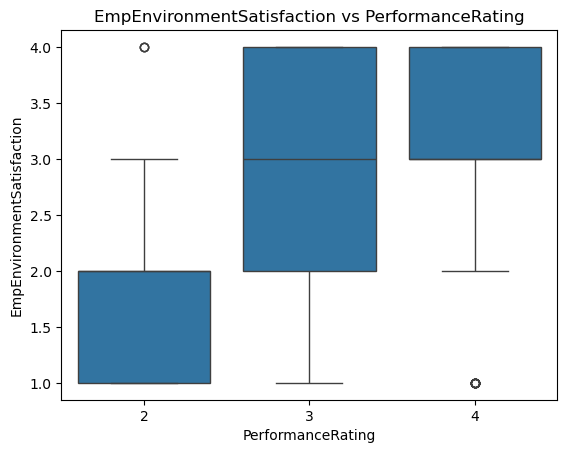

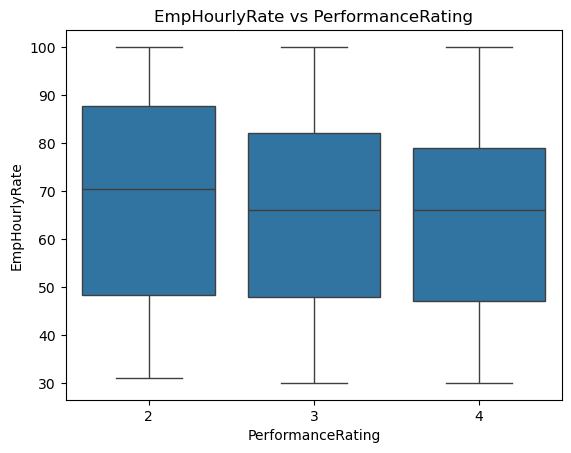

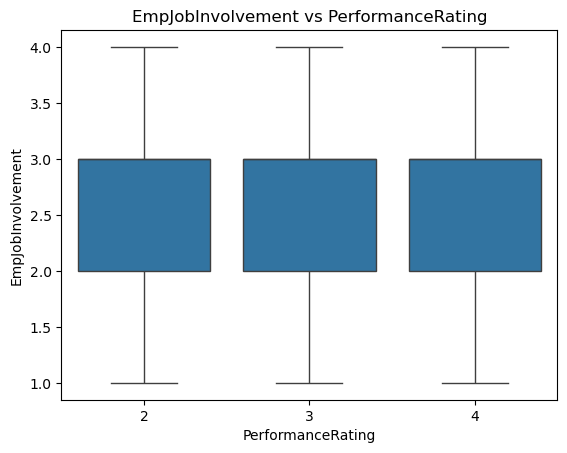

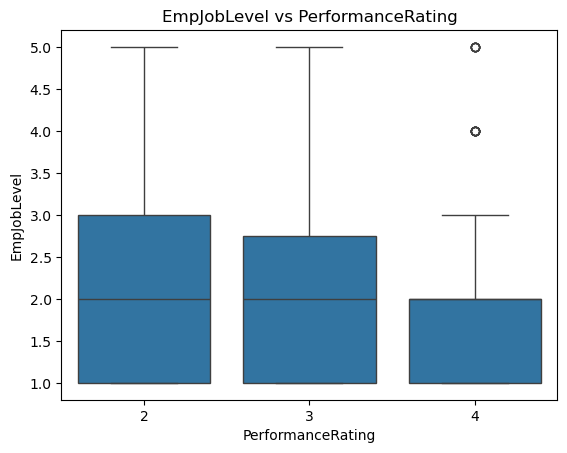

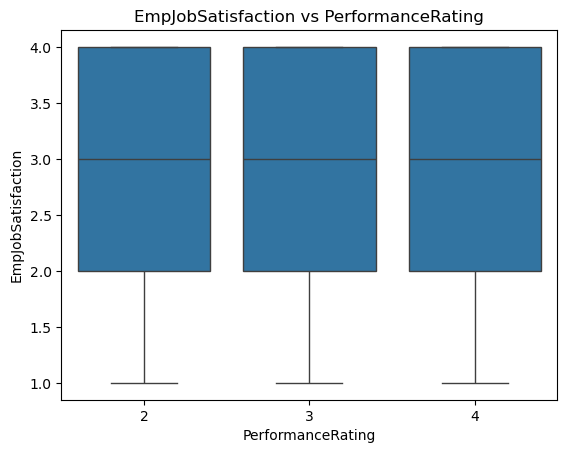

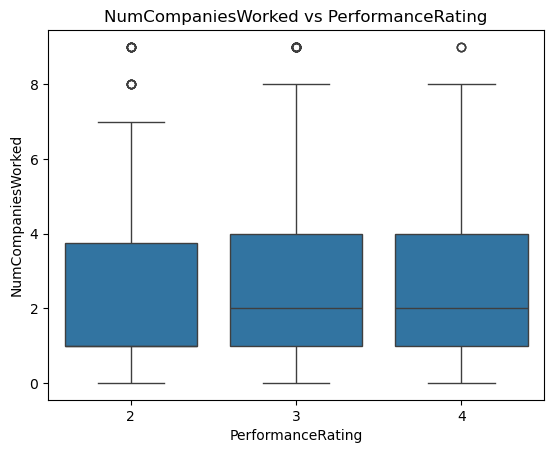

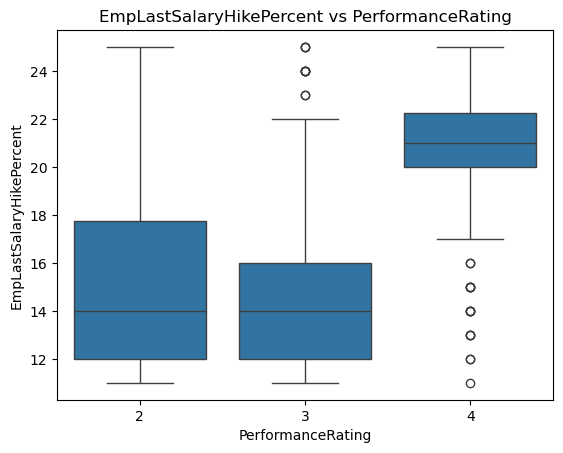

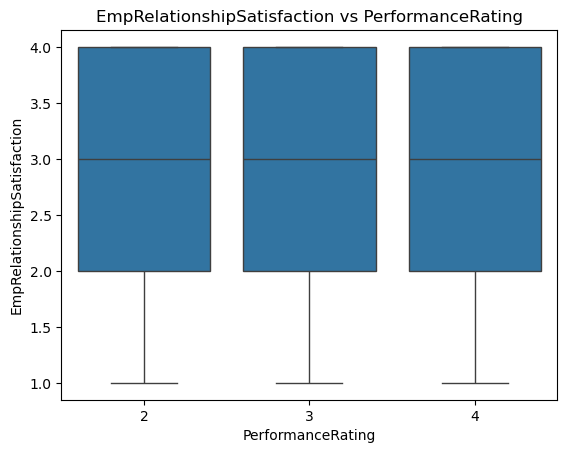

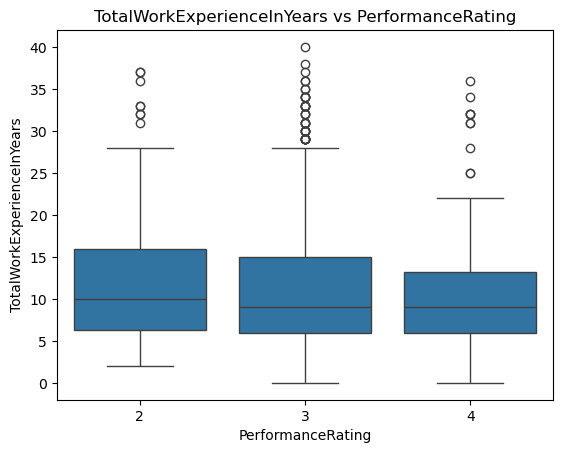

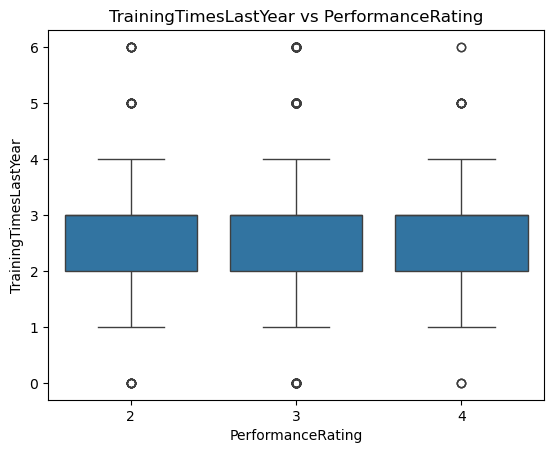

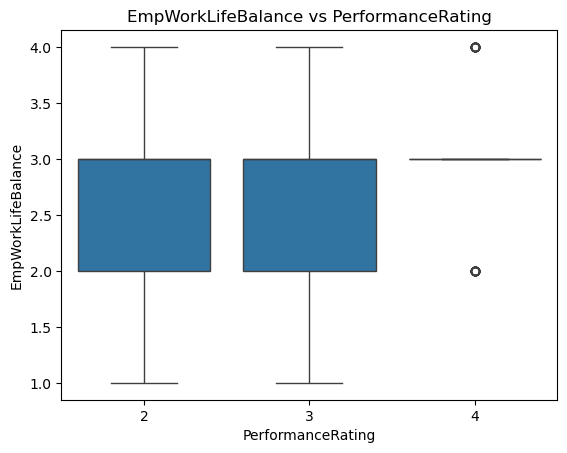

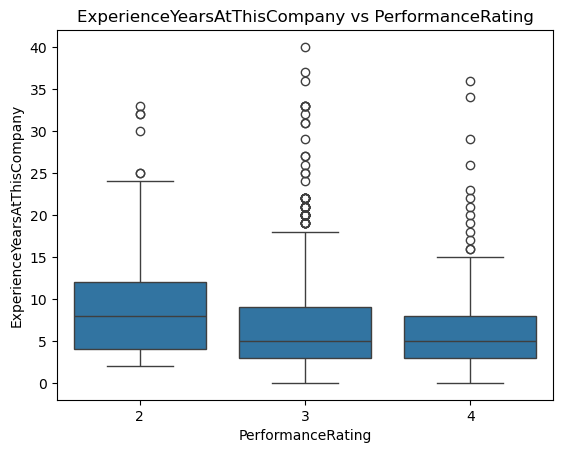

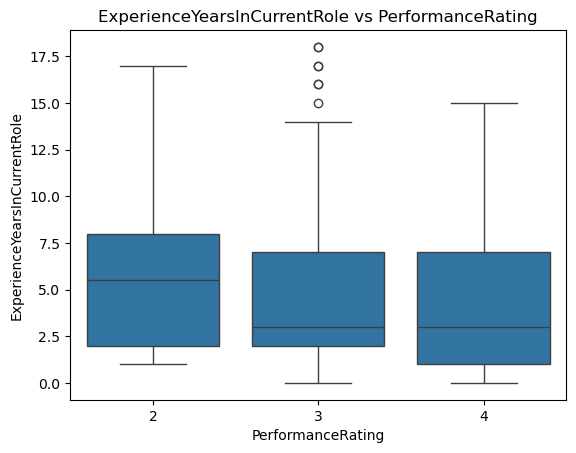

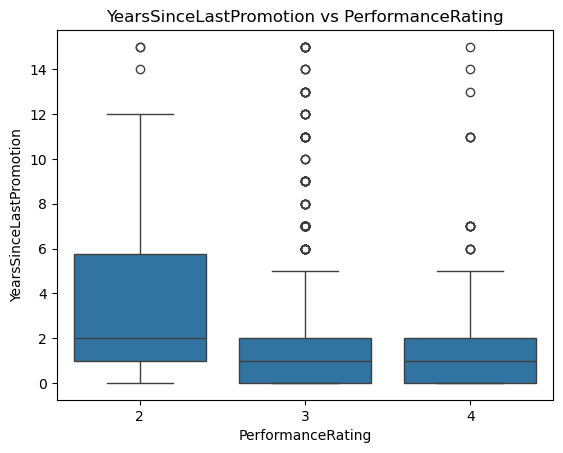

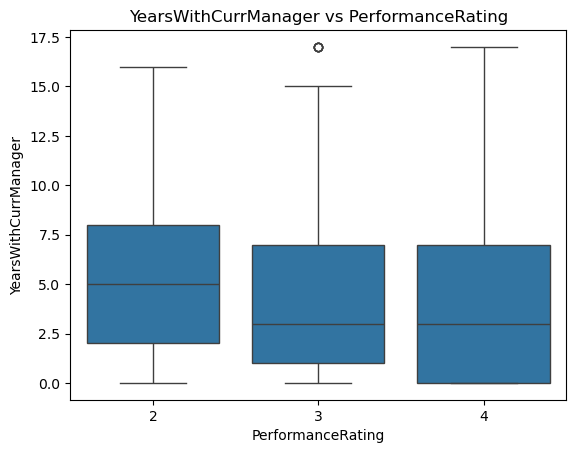

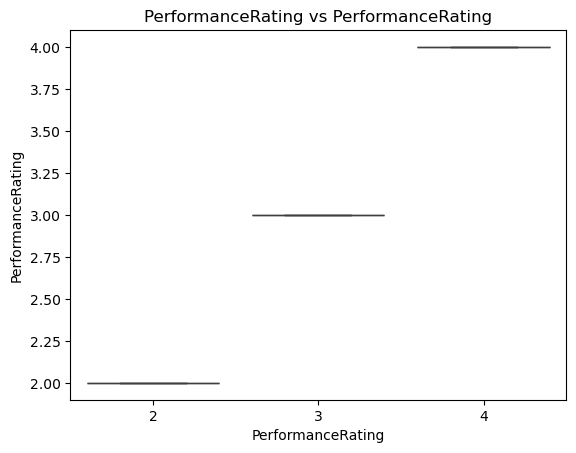

In [235]:
for col in emp_num_cols:
    sns.boxplot(x='PerformanceRating', y=col, data=employee_df)
    plt.title(f'{col} vs PerformanceRating')
    plt.show()

- Higher job involvement is linked to higher performance.
- Higher salary hike percent is associated with better performance.
- Employees with recent promotions tend to have higher ratings.
- Employees living closer to office show slightly better performance.
- Work-life balance is slightly better among higher performers.

**Hypothesis Testing**(To ensure that the insights derived from the exploratory analysis are statistically valid)

In [236]:
'''statement1:
H₀: Gender and PerformanceRating are independent
H₁: Gender affects PerformanceRating

statement2:
H₀: Department and PerformanceRating are independent
H₁: Department affects PerformanceRating

statement3:
H₀: BusinessTravelFrequency and PerformanceRating are independent
H₁: Travel frequency affects PerformanceRating'''

from scipy.stats import chi2_contingency
for col in['Gender','EmpDepartment','BusinessTravelFrequency']:
    ct = pd.crosstab(employee_df[col], employee_df['PerformanceRating'])
    chi2, p, dof, expected = chi2_contingency(ct)
    print(f" column_name = {col} ,Chi2 = {chi2:.3f}, P-value = {p:.5f}")

 column_name = Gender ,Chi2 = 0.163, P-value = 0.92176
 column_name = EmpDepartment ,Chi2 = 70.328, P-value = 0.00000
 column_name = BusinessTravelFrequency ,Chi2 = 4.397, P-value = 0.35490


Chi-square results show that Gender (p=0.92) and BusinessTravelFrequency (p=0.35) have no significant impact on PerformanceRating, while EmpDepartment (p=0.000) has a strong and significant influence on employee performance.

In [237]:
''' statement1:
H₀: Mean Age is the same across all PerformanceRating groups.
H₁: At least one PerformanceRating group has a different mean Age.

statement2:
H₀: Mean SalaryHikePercent is the same across all PerformanceRating groups.
H₁: At least one PerformanceRating group has a different mean SalaryHikePercent

statement3:
H₀: Mean JobInvolvement is the same across all PerformanceRating groups.
H₁: At least one PerformanceRating group has a different mean JobInvolvement.'''

from scipy.stats import f_oneway

numeric_cols = ['Age', 'EmpLastSalaryHikePercent', 'EmpJobInvolvement']

for col in numeric_cols:
    # Split the numeric column into groups based on PerformanceRating
    group2 = employee_df[employee_df['PerformanceRating'] == 2][col]
    group3 = employee_df[employee_df['PerformanceRating'] == 3][col]
    group4 = employee_df[employee_df['PerformanceRating'] == 4][col]

    # Perform One-way ANOVA
    f_stat, p_value = f_oneway(group2, group3, group4)

    print(f" column_name = {col} , F-stat = {f_stat:.3f}, P-value = {p_value:.5f}")


 column_name = Age , F-stat = 1.156, P-value = 0.31508
 column_name = EmpLastSalaryHikePercent , F-stat = 240.837, P-value = 0.00000
 column_name = EmpJobInvolvement , F-stat = 0.606, P-value = 0.54562


ANOVA results show that Age (p=0.315) and JobInvolvement (p=0.545) do not significantly affect PerformanceRating, while EmpLastSalaryHikePercent (p=0.000) has a strong and significant impact on performance.

In [238]:
employee_df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [239]:
employee_df.duplicated().sum()

0

**Outlier Detection and Handling**

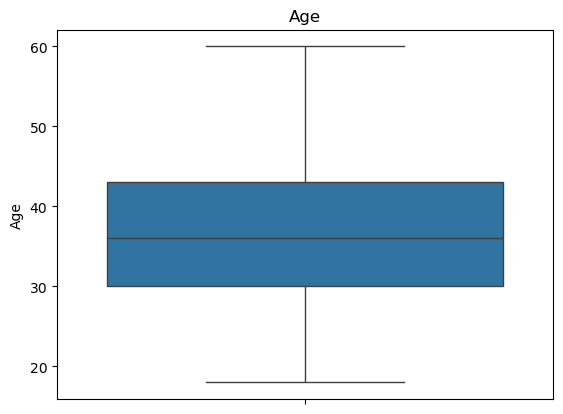

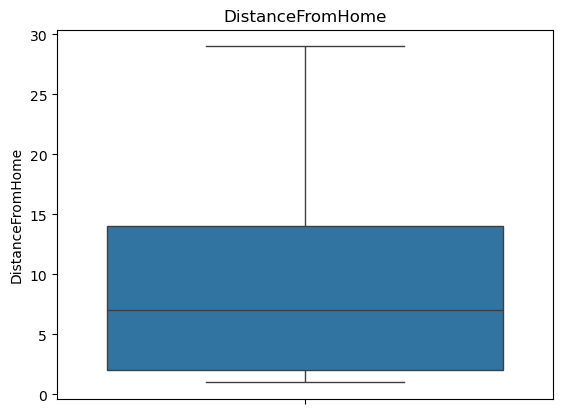

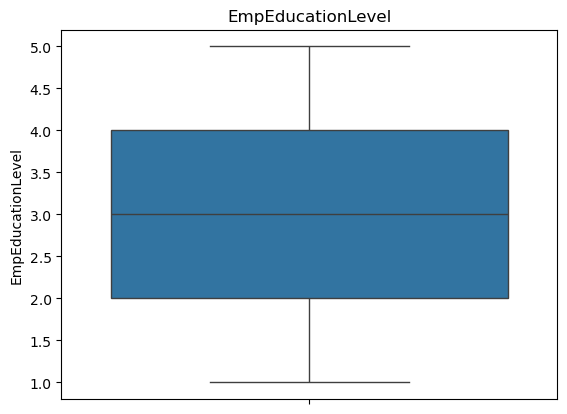

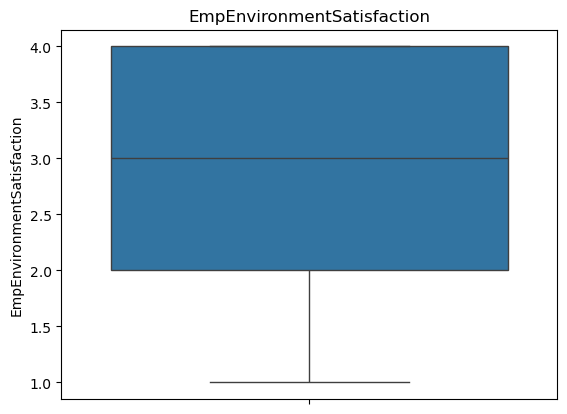

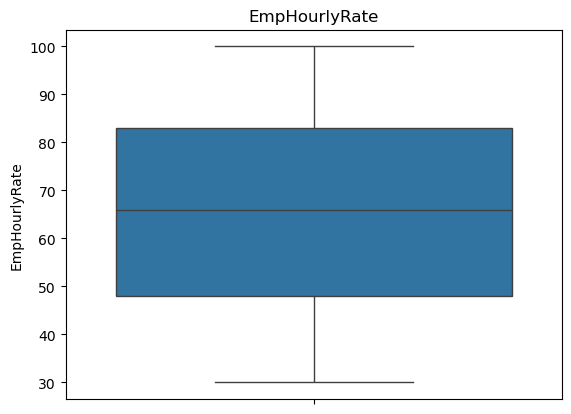

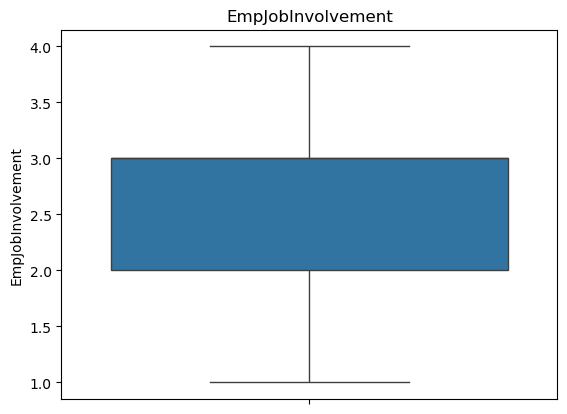

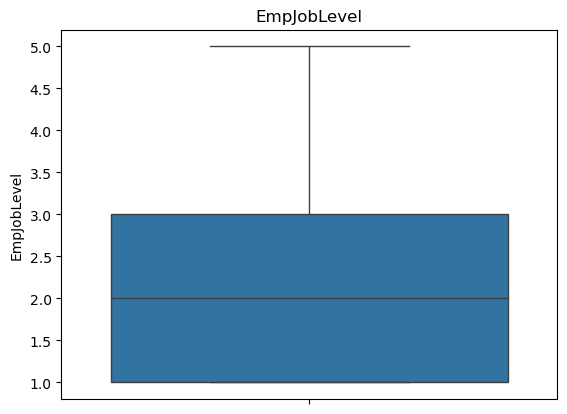

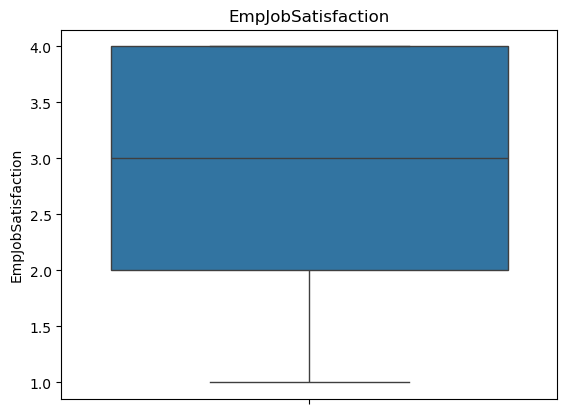

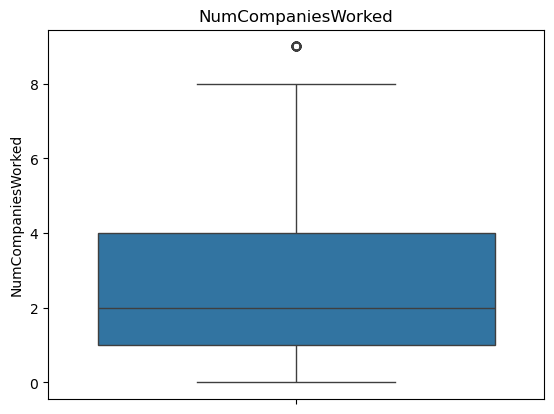

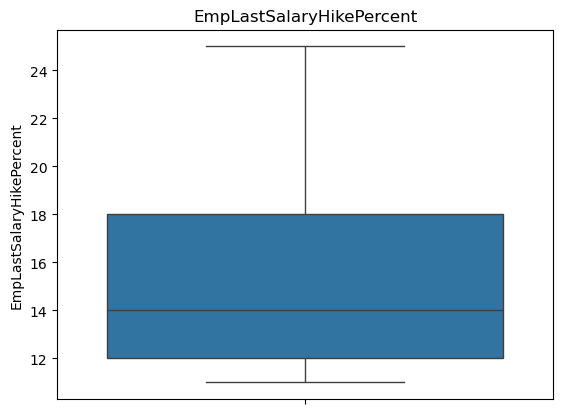

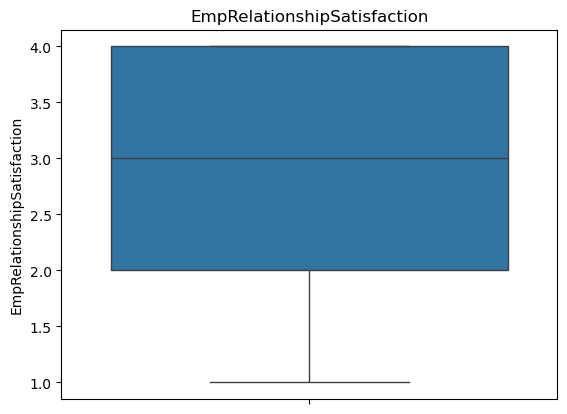

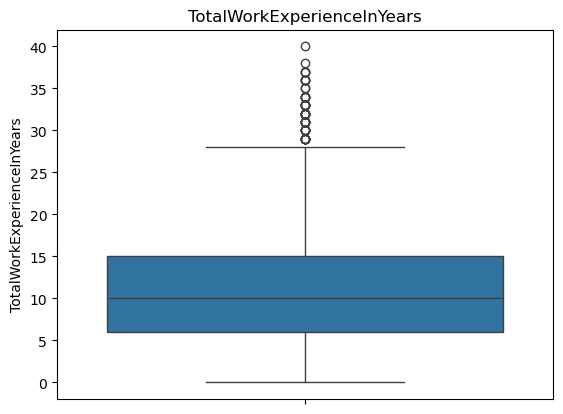

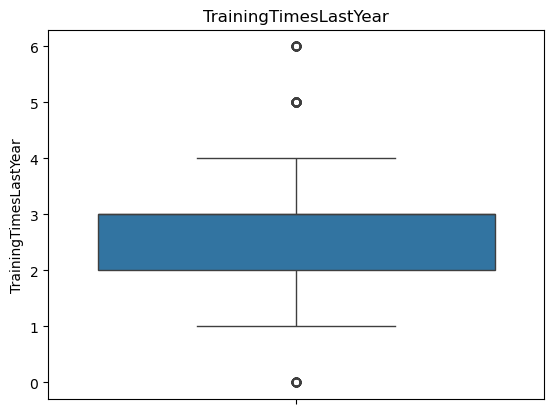

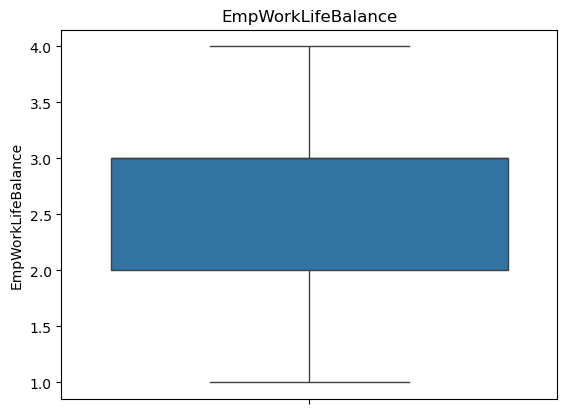

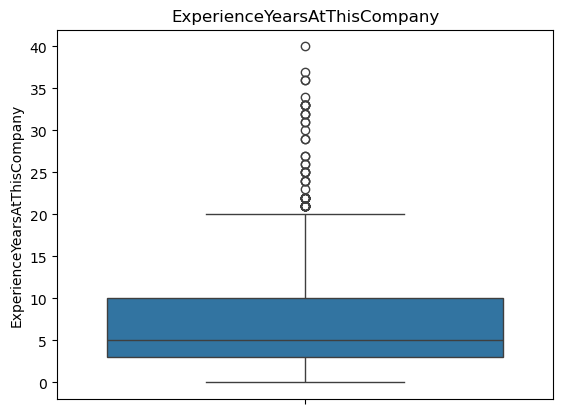

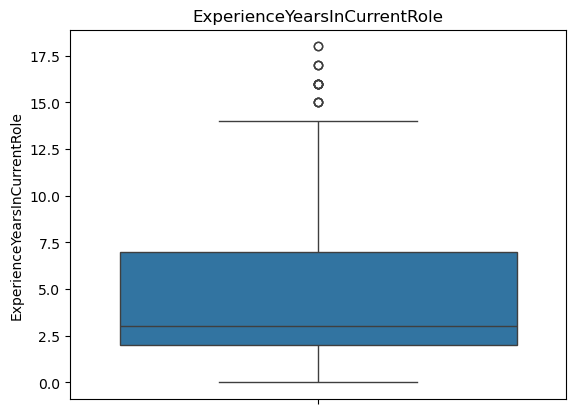

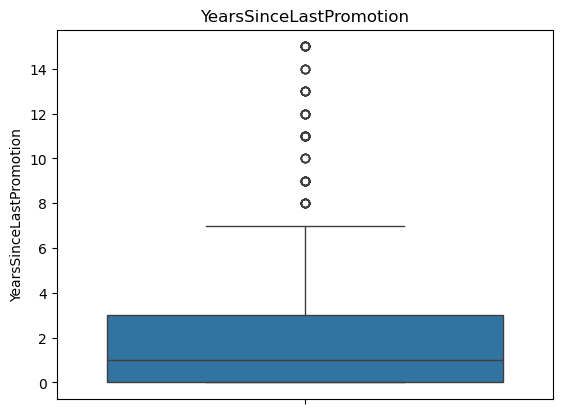

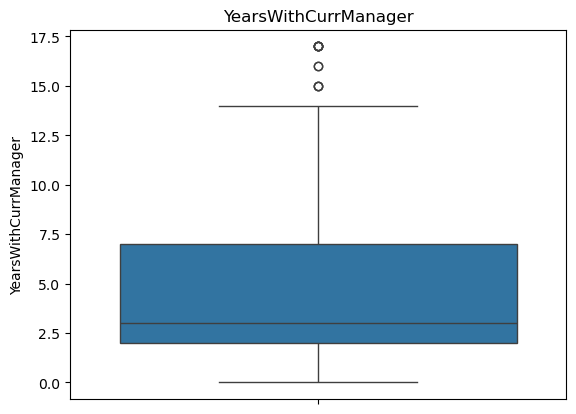

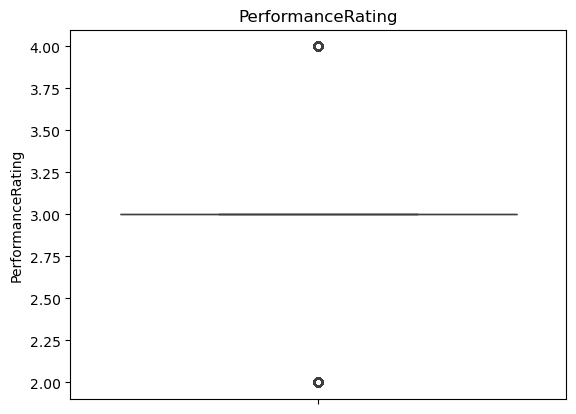

In [240]:
for col in emp_num_cols:
    sns.boxplot(employee_df[col])
    plt.title(col)
    plt.show()

- DistanceFromHome shows a few far-distance outliers around 20–30 km.
- NumCompaniesWorked has clear outliers where employees worked in 7+ companies.
- EmpLastSalaryHikePercent includes rare high hikes in the 22–25% range.
- TotalWorkExperienceInYears contains long-experience outliers above 30 years.
- ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole show tenure-based outliers, with values 30+ years and 15+ years respectively.
- YearsSinceLastPromotion has extreme values indicating 10–15 years without promotion.
- YearsWithCurrManager contains outliers above 12 years with the same manager.
- Age, EmpJobInvolvement, EmpEducationLevel, JobSatisfaction, and WorkLifeBalance show minimal or no outliers, indicating stable distributions.

In [241]:
outlier_cols = [
    'DistanceFromHome',
    'NumCompaniesWorked',
    'EmpLastSalaryHikePercent',
    'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany',
    'ExperienceYearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]
for col in outlier_cols:
    Q1 = employee_df[col].quantile(0.25)
    Q3 = employee_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    employee_df[col] = np.where(employee_df[col] < lower, lower,
                       np.where(employee_df[col] > upper, upper, employee_df[col]))


In [242]:
emp_cat_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [243]:
employee_df['Gender'].value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [244]:
employee_df['EducationBackground'].value_counts()

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [245]:
employee_df['MaritalStatus'].value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [246]:
employee_df['EmpDepartment'].value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [247]:
employee_df['EmpJobRole'].value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [248]:
employee_df['BusinessTravelFrequency'].value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [249]:
employee_df['OverTime'].value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [250]:
employee_df['Attrition'].value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [251]:
employee_df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

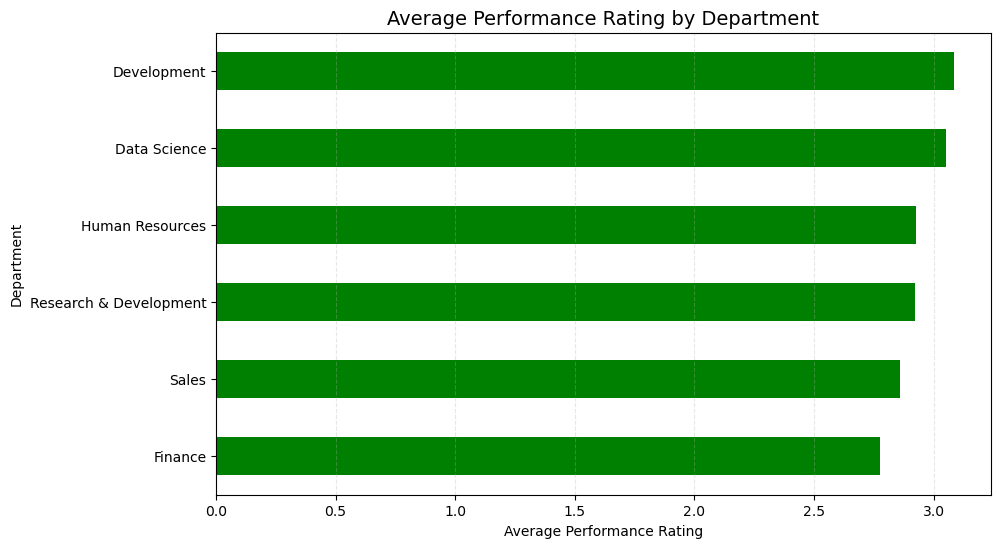

In [252]:
import matplotlib.pyplot as plt

dept_perf = employee_df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values()

plt.figure(figsize=(10,6))
dept_perf.plot(kind='barh', color='green')
plt.title('Average Performance Rating by Department', fontsize=14)
plt.xlabel('Average Performance Rating')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.show()

- Development has the highest average performance rating (3.08), indicating strong productivity and consistent output.
- Data Science follows closely (3.05), showing good performance levels despite being a smaller department.
- Human Resources (2.93) and Research & Development (2.92) show moderate performance, with room for improvement.
- Sales has a lower average performance rating (2.86), suggesting possible workload, training, or target-related challenges.
- Finance shows the lowest performance rating (2.77), indicating the need for focused performance improvement strategies in this department.

In [253]:
x = employee_df.drop(['PerformanceRating','EmpNumber'], axis=1)
y= employee_df['PerformanceRating']

**Encoding**
-Binary categorical features were encoded using Label Encoding, as these columns contain only two possible values and can be efficiently represented as 0/1.
-For multi-category features, One-Hot Encoding was applied to avoid introducing false ordinal relationships and to ensure that each category is treated independently during model training.

In [254]:
binary_cols = ['Gender', 'OverTime', 'Attrition']

multi_cat_cols = [
    'EducationBackground',
    'MaritalStatus',
    'EmpDepartment',
    'EmpJobRole',
    'BusinessTravelFrequency'
]

from sklearn.preprocessing import LabelEncoder

# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    x[col] = le.fit_transform(x[col])

# One-Hot encode multi-category columns
x = pd.get_dummies(x, columns=multi_cat_cols, drop_first=True)

# Convert boolean dummies to 0/1
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)

In [255]:
x.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,1,10.0,3,4,55,3,2,4,1.0,...,0,0,1,0,0,0,0,0,0,1
1,47,1,14.0,4,4,42,3,2,1,2.0,...,0,0,1,0,0,0,0,0,0,1
2,40,1,5.0,4,4,48,2,3,1,5.0,...,0,0,1,0,0,0,0,0,1,0
3,41,1,10.0,4,2,73,2,5,4,3.0,...,0,0,0,0,0,0,0,0,0,1
4,60,1,16.0,4,1,84,3,2,1,8.0,...,0,0,1,0,0,0,0,0,0,1


**scaling**
Only the true numerical features (excluding binary 0/1 encoded columns like Gender, OverTime, and Attrition) were standardized using StandardScaler.
This ensures that all continuous variables are brought to a similar scale, improving the performance of distance-based models such as SVM, while preventing unnecessary scaling of binary categorical variables that already carry meaningful encoded values.

In [256]:
# Identify numeric columns
numeric_cols = x.select_dtypes(include=['int64', 'float64']).columns

# Remove binary 0/1 columns so they don't get scaled
binary_cols = ['Gender', 'OverTime', 'Attrition']
numeric_cols = [c for c in numeric_cols if c not in binary_cols]

# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])


In [257]:
x.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,-0.541458,1,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.679082,...,0,0,1,0,0,0,0,0,0,1
1,1.109888,1,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.267205,...,0,0,1,0,0,0,0,0,0,1
2,0.339260,1,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.968425,...,0,0,1,0,0,0,0,0,1,0
3,0.449349,1,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.144672,...,0,0,0,0,0,0,0,0,0,1
4,2.541054,1,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.204056,...,0,0,1,0,0,0,0,0,0,1


In [258]:
corr_ms = x[numeric_cols].corr()
corr_ms

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.287782,-0.006105,0.049749,0.678801,-0.016053,-0.019563,0.293021,0.214702,0.204328,0.204620
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.020582,0.044974,-0.009509,0.027012,-0.032082,-0.044788,0.024916,0.020975,0.021456,0.016618
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.129306,0.002358,-0.016690,0.146630,-0.013674,0.010276,0.065261,0.067697,0.058112,0.087003
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.016757,-0.047271,-0.010504,-0.018166,0.001192,-0.000262,-0.000953,0.028774,0.011969,-0.012109
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.041594,-0.015934,0.008783,0.025190,-0.024160,0.016189,-0.006316,-0.012395,-0.025872,-0.003064
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.017673,-0.001742,0.018037,-0.027697,-0.025168,-0.014129,-0.026123,0.002887,-0.004712,0.013550
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.128924,-0.020975,0.002992,0.788135,-0.000389,0.049218,0.529213,0.395014,0.320070,0.377853
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.050763,0.031847,-0.022028,-0.028180,-0.028031,-0.018548,0.005359,0.002546,-0.002238,-0.021720
NumCompaniesWorked,0.287782,-0.020582,0.129306,0.016757,0.041594,0.017673,0.128924,-0.050763,1.000000,-0.011527,0.057489,0.236562,-0.051168,0.002536,-0.126766,-0.100523,-0.045470,-0.111535
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011527,1.000000,-0.042892,-0.010682,-0.013439,-0.017001,-0.015483,-0.003530,-0.031267,-0.006937


In [259]:
corr_ms[corr_ms >0.9]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEducationLevel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEnvironmentSatisfaction,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpHourlyRate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobInvolvement,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobLevel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCompaniesWorked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpLastSalaryHikePercent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
corr_ms[corr_ms >0.8]

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEducationLevel,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpEnvironmentSatisfaction,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpHourlyRate,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobInvolvement,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobLevel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobSatisfaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumCompaniesWorked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpLastSalaryHikePercent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Department wise performances**

In [261]:
num = x[numeric_cols]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame({"Feature" : num.columns,
                       "VIF" : [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
                       })

print(vif_df.sort_values("VIF", ascending = False))

                         Feature       VIF
14  ExperienceYearsAtThisCompany  5.724667
11    TotalWorkExperienceInYears  4.688196
15  ExperienceYearsInCurrentRole  3.312266
17          YearsWithCurrManager  3.114201
6                    EmpJobLevel  2.720257
0                            Age  2.036031
16       YearsSinceLastPromotion  1.568378
8             NumCompaniesWorked  1.250823
2              EmpEducationLevel  1.062704
4                  EmpHourlyRate  1.020702
10   EmpRelationshipSatisfaction  1.015188
7             EmpJobSatisfaction  1.013647
5              EmpJobInvolvement  1.013455
3     EmpEnvironmentSatisfaction  1.013373
13            EmpWorkLifeBalance  1.012855
12         TrainingTimesLastYear  1.010411
9       EmpLastSalaryHikePercent  1.009505
1               DistanceFromHome  1.009317


The VIF analysis reveals moderate multicollinearity among tenure-related variables such as ExperienceYearsAtThisCompany (VIF ≈ 5.7),TotalWorkExperienceInYears (VIF ≈ 4.7), ExperienceYearsInCurrentRole (VIF ≈ 3.3), and YearsWithCurrManager (VIF ≈ 3.1). 
- This pattern is expected because these features naturally measure overlapping aspects of employee tenure and progression within the company.
- However, all VIF values remain below the critical threshold of 10, indicating that the multicollinearity present is not severe and does not require removing any feature.
- Since the planned modelsare robust against multicollinearity, all features can be safely retained for modeling without negatively impacting performance.

In [262]:
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [263]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x_train, x_test, y_train, y_test =  train_test_split(x,y, train_size=0.75, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())

Before SMOTE: {3: 656, 2: 145, 4: 99}
After SMOTE: {3: 656, 4: 656, 2: 656}


In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))

[[ 39  10   0]
 [  5 211   2]
 [  0   9  24]]
              precision    recall  f1-score   support

           2      0.886     0.796     0.839        49
           3      0.917     0.968     0.942       218
           4      0.923     0.727     0.814        33

    accuracy                          0.913       300
   macro avg      0.909     0.830     0.865       300
weighted avg      0.913     0.913     0.911       300



- The model achieved 91% accuracy, showing strong overall performance.
- Rating 3 (average performers) is predicted very accurately with very few errors.
- Low performers (Rating 2) are identified well, with most mistakes being only slightly higher (2 → 3).
- High performers (Rating 4) are mostly predicted correctly, with errors going to Rating 3, not Rating 2.
- No extreme misclassification occurs (like 2 ↔ 4), making the model safe and reliable for HR decisions.

In [292]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit on original training labels
y_train_enc = le.fit_transform(y_train_resampled)   # maps (2,3,4) → (0,1,2)
y_test_enc  = le.transform(y_test)

print("Classes Mapping:", le.classes_)


Classes Mapping: [2 3 4]


In [293]:
from xgboost import XGBClassifier
import numpy as np

num_classes = len(le.classes_)   # should be 3

xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(x_train_resampled, y_train_enc)

y_pred_enc = xgb.predict(x_test)
y_pred = le.inverse_transform(y_pred_enc)   # convert back to 2,3,4

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


[[ 40   8   1]
 [  6 208   4]
 [  0   3  30]]
              precision    recall  f1-score   support

           2      0.870     0.816     0.842        49
           3      0.950     0.954     0.952       218
           4      0.857     0.909     0.882        33

    accuracy                          0.927       300
   macro avg      0.892     0.893     0.892       300
weighted avg      0.926     0.927     0.926       300



- XGBoost achieved 92.7%, outperforming RandomForest’s 91.3%, showing stronger generalization on unseen data.
- XGBoost improved recall from 0.727 → 0.909, meaning it identifies top-performing employees much more reliably than RandomForest.
- XGBoost’s macro recall (0.893) is significantly higher than RandomForest’s (0.830), indicating fewer class-wise biases.
- RandomForest misclassified several Class-4 employees as Class-3 (9 instances), while XGBoost drastically reduced this to 3 mistakes, improving decision safety.
- For Class 3 (largest group), F1 improved from 0.942 → 0.952, showing XGBoost better captures subtle patterns in the dominant class.

In [294]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create CatBoost model (default settings)
cat_model = CatBoostClassifier(
    loss_function='MultiClass', 
    random_state=42,
    verbose=0  
)

# Train the model
cat_model.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_cat = cat_model.predict(x_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat, digits=3))


[[ 42   7   0]
 [  6 210   2]
 [  1   5  27]]
              precision    recall  f1-score   support

           2      0.857     0.857     0.857        49
           3      0.946     0.963     0.955       218
           4      0.931     0.818     0.871        33

    accuracy                          0.930       300
   macro avg      0.911     0.880     0.894       300
weighted avg      0.930     0.930     0.929       300



- CatBoost achieved the highest accuracy (93.0%), slightly better than both RandomForest (91.3%) and XGBoost (92.7%).
- Class 3 (majority class) continues to be predicted extremely well (F1 = 0.955), showing that CatBoost captures overall patterns most effectively.
- Class 4 (high performers) improved over RandomForest (0.814 → 0.871 F1) but is slightly below XGBoost (0.882), still performing very strongly.
- Class 2 (low performers) is predicted consistently with balanced precision and recall (both 0.857), better than RandomForest and similar to XGBoost.
- Overall macro F1 increased to 0.894, showing CatBoost provides more balanced performance across all three classes than RandomForest and is nearly equal to XGBoost.

In [295]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# LightGBM model (default, multiclass)
lgb_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,       # because classes are 2,3,4 → 3 unique classes
    random_state=42
)

# Train the model
lgb_model.fit(x_train_resampled, y_train_resampled)

# Predictions
y_pred_lgb = lgb_model.predict(x_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb, digits=3))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4641
[LightGBM] [Info] Number of data points in the train set: 1968, number of used features: 48
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Confusion Matrix:
[[ 40   8   1]
 [  5 212   1]
 [  0   4  29]]

Classification Report:
              precision    recall  f1-score   support

           2      0.889     0.816     0.851        49
           3      0.946     0.972     0.959       218
           4      0.935     0.879     0.906        33

    accuracy  

- LightGBM achieved 93.7% accuracy, indicating strong overall predictive performance.
- The model predicts the majority class (Rating 3) very accurately, with high recall (0.972) and F1-score (0.959).
- High performers (Rating 4) are identified well, with an F1-score of 0.906 and minimal misclassification.
- Low performers (Rating 2) are detected with balanced precision (0.889) and recall (0.816), showing reliable performance.
- Evaluation metrics (macro F1 = 0.906, weighted F1 = 0.936) indicate that the model performs consistently across all classes despite class imbalance.

                         feature  importance
15            EmpWorkLifeBalance         931
11      EmpLastSalaryHikePercent         812
4     EmpEnvironmentSatisfaction         681
18       YearsSinceLastPromotion         550
5                  EmpHourlyRate         519
2               DistanceFromHome         466
19          YearsWithCurrManager         456
0                            Age         445
17  ExperienceYearsInCurrentRole         423
14         TrainingTimesLastYear         380


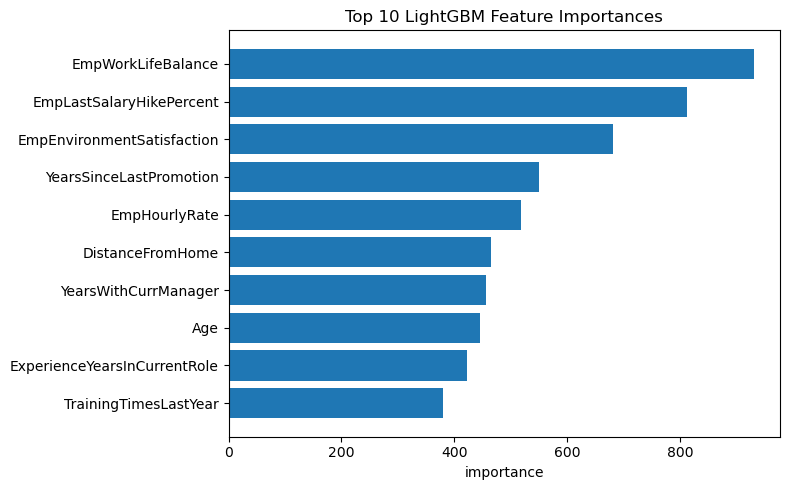

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
fi = pd.DataFrame({'feature': x_train_resampled.columns, 'importance': lgb_model.feature_importances_})
fi = fi.sort_values('importance', ascending=False)
print(fi.head(10))

# simple barplot
plt.figure(figsize=(8,5))
plt.barh(fi['feature'].head(10)[::-1], fi['importance'].head(10)[::-1])
plt.title('Top 10 LightGBM Feature Importances')
plt.xlabel('importance')
plt.tight_layout()
plt.show()

- Work–Life Balance is the strongest predictor of employee performance, indicating that employees with better balance tend to perform significantly higher.
- Last Salary Hike % is highly influential, showing that timely and adequate salary increments are strongly linked to better performance ratings.
- Environment Satisfaction is a major driver — employees satisfied with their work environment consistently perform better.
- Years Since Last Promotion has strong impact, suggesting that delayed promotions may negatively affect motivation and performance.
- Hourly Rate contributes notably, implying that compensation levels influence performance quality.
- Distance From Home matters, where long travel distances may affect consistency and productivity.
- Years With Current Manager is important, indicating the influence of manager–employee relationship on performance.
- Age also plays a role, showing that performance varies moderately with maturity and experience.
- Experience in Current Role contributes, reflecting how role familiarity improves performance.
- Training Times Last Year has meaningful effect, indicating that frequent training supports higher performance levels.

In [296]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# create SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# train SVM
svm.fit(x_train_resampled, y_train_resampled)

# predictions
y_pred_svm = svm.predict(x_test)

# evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, digits=3))


Confusion Matrix:
[[ 27  21   1]
 [  9 201   8]
 [  1  14  18]]

Classification Report:
              precision    recall  f1-score   support

           2      0.730     0.551     0.628        49
           3      0.852     0.922     0.885       218
           4      0.667     0.545     0.600        33

    accuracy                          0.820       300
   macro avg      0.749     0.673     0.704       300
weighted avg      0.811     0.820     0.812       300



- Overall accuracy is 82%, which is lower than RF, XGBoost, CatBoost, and LightGBM — showing that SVM is not the best performer for this dataset.
- Class 3 is detected well (recall 0.922), meaning SVM identifies most "Good" performers correctly.
- Class 2 and Class 4 performance is weak — recall = 0.551 and 0.545 respectively, meaning SVM misclassifies many low and high performers.
- Macro F1 = 0.704, indicating imbalanced performance across classes, especially failing on minority classes.
- SVM struggles with non-linearity + high dimensional categorical features, making it less suitable than tree-based models for this dataset.

**Hyperparameter Tunning**

In [280]:
#RandonForestClassification
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint 

rf = RandomForestClassifier(random_state=42) 
param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}
rand_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,         # tries 30 random combos
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_rf.fit(x_train_resampled, y_train_resampled)
print("Best Params:", rand_rf.best_params_)
best_rf = rand_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(x_test)
y_prob_rf_tuned = best_rf.predict_proba(x_test)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned, digits=3))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 171}

Confusion Matrix:
 [[ 39  10   0]
 [  5 211   2]
 [  0   9  24]]

Classification Report:
               precision    recall  f1-score   support

           2      0.891     0.837     0.863        49
           3      0.934     0.968     0.950       218
           4      0.929     0.788     0.852        33

    accuracy                          0.927       300
   macro avg      0.918     0.864     0.889       300
weighted avg      0.926     0.927     0.925       300



In [281]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint, uniform, loguniform
import numpy as np

# base model
xgb = XGBClassifier(objective='multi:softprob',
                    num_class=len(le.classes_),
                    use_label_encoder=False,
                    eval_metric='mlogloss',
                    random_state=42)

# parameter distributions (wide search)
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 10),
    'learning_rate': loguniform(1e-3, 1.0),   # 0.001 - 1.0
    'subsample': uniform(0.6, 0.4),           # 0.6 - 1.0
    'colsample_bytree': uniform(0.5, 0.5),    # 0.5 - 1.0
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10),
    'reg_alpha': loguniform(1e-8, 10),
    'reg_lambda': loguniform(1e-8, 10)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,                 # change to 80-100 if you have time
    scoring='f1_weighted',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42,
    return_train_score=False
)

# run
rs.fit(x_train_resampled, y_train_enc)

print("Best params:", rs.best_params_)
print("Best CV score (f1_weighted):", rs.best_score_)

# evaluate on test - predict with best estimator
best_xgb = rs.best_estimator_
y_pred_enc = best_xgb.predict(x_test)       # returns encoded labels
y_pred = le.inverse_transform(y_pred_enc)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'colsample_bytree': 0.5971369767560211, 'gamma': 0.3547045849996383, 'learning_rate': 0.015500706089539403, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 192, 'reg_alpha': 2.40019526005485e-05, 'reg_lambda': 7.011928170388231e-08, 'subsample': 0.8313120563984696}
Best CV score (f1_weighted): 0.9710337991520838
Confusion Matrix:
[[ 41   8   0]
 [  5 211   2]
 [  0   5  28]]

Classification Report:
              precision    recall  f1-score   support

           2      0.891     0.837     0.863        49
           3      0.942     0.968     0.955       218
           4      0.933     0.848     0.889        33

    accuracy                          0.933       300
   macro avg      0.922     0.884     0.902       300
weighted avg      0.933     0.933     0.933       300



In [282]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint, uniform, loguniform
import numpy as np

# 1a) create a small hold-out validation set from training for early stopping
X_tr, X_val, y_tr, y_val = train_test_split(
    x_train_resampled, y_train_resampled, test_size=0.10, 
    stratify=y_train_resampled, random_state=42
)

# base estimator (scikit-learn wrapper)
cat = CatBoostClassifier(
    loss_function='MultiClass',
    random_seed=42,
    verbose=0
)

# parameter distributions for randomized search
param_dist = {
    'iterations': randint(200, 2000),            # boosting rounds
    'depth': randint(3, 10),
    'learning_rate': loguniform(1e-3, 0.5),      # sample over orders of magnitude
    'l2_leaf_reg': loguniform(1e-3, 10),
    'border_count': randint(32, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 20.0),
    'rsm': uniform(0.5, 0.5)                     # feature subsample ratio (0.5-1.0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=40,                  # increase to 80-100 if you have time
    scoring='f1_weighted',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42,
    return_train_score=False
)

# Use early stopping by passing eval_set and early_stopping_rounds to fit()
rs.fit(
    X_tr, y_tr,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50
)

print("Best params:", rs.best_params_)
print("Best CV (f1_weighted):", rs.best_score_)

best_cat = rs.best_estimator_

# Evaluate on test set
y_pred = best_cat.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'bagging_temperature': 0.033050732900548385, 'border_count': 160, 'depth': 5, 'iterations': 1861, 'l2_leaf_reg': 0.003798214508453258, 'learning_rate': 0.02094200787316247, 'random_strength': 19.713009082212015, 'rsm': 0.6210276357557503}
Best CV (f1_weighted): 0.9751787358535017
Confusion Matrix:
 [[ 42   7   0]
 [  6 211   1]
 [  1   5  27]]

Classification Report:
               precision    recall  f1-score   support

           2      0.857     0.857     0.857        49
           3      0.946     0.968     0.957       218
           4      0.964     0.818     0.885        33

    accuracy                          0.933       300
   macro avg      0.923     0.881     0.900       300
weighted avg      0.934     0.933     0.933       300



In [284]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform, loguniform
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# base model
lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train_resampled)),
    random_state=42
)

param_dist = {
    'n_estimators': randint(100, 1000),
    'num_leaves': randint(20, 200),
    'max_depth': randint(3, 12),
    'learning_rate': loguniform(1e-3, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5),
    'min_child_samples': randint(5, 100),
    'reg_alpha': loguniform(1e-8, 10),
    'reg_lambda': loguniform(1e-8, 10)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=cv,
    verbose=2,
    random_state=42
)

rs.fit(x_train_resampled, y_train_resampled)

print("Best params:", rs.best_params_)
print("Best CV score:", rs.best_score_)

best_lgb = rs.best_estimator_

y_pred = best_lgb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4635
[LightGBM] [Info] Number of data points in the train set: 1968, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [285]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, loguniform
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

svc = SVC(probability=True, random_state=42)

param_dist = {
    'C': loguniform(1e-2, 1e3),           # regularization
    'gamma': loguniform(1e-4, 1e1),       # kernel coef for rbf
    'kernel': ['rbf', 'poly'],            # try rbf and poly
    'degree': [2,3,4]                     # only used if kernel='poly'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=40,                # increase if you have more time
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

rs.fit(x_train_resampled, y_train_resampled)

print("Best params:", rs.best_params_)
best_svc = rs.best_estimator_

y_pred = best_svc.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'C': 12.229467525390595, 'degree': 3, 'gamma': 0.042051564509138675, 'kernel': 'poly'}
Confusion Matrix:
 [[ 24  22   3]
 [ 15 200   3]
 [  4  13  16]]

Classification Report:
               precision    recall  f1-score   support

           2      0.558     0.490     0.522        49
           3      0.851     0.917     0.883       218
           4      0.727     0.485     0.582        33

    accuracy                          0.800       300
   macro avg      0.712     0.631     0.662       300
weighted avg      0.790     0.800     0.791       300



In [337]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, roc_auc_score
)

results = []

def evaluate_model_multiclass(name, model, X_test, y_test, label_encoder=None):
    """
    Evaluates a multiclass model. If model was trained on encoded labels (0..n-1),
    provide the LabelEncoder used (label_encoder=le) so predictions are inverse-mapped
    back to original labels before scoring.
    """
    # get raw predictions from the model
    y_pred_raw = model.predict(x_test)

    # if model outputs encoded classes (0..n-1) and a label_encoder is provided,
    # inverse transform predictions to original labels (e.g. 2,3,4)
    if label_encoder is not None:
        try:
            y_pred = label_encoder.inverse_transform(np.asarray(y_pred_raw, dtype=int))
        except Exception:
            # fallback if prediction is already in original label space
            y_pred = y_pred_raw
    else:
        y_pred = y_pred_raw

    # multiclass ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)  # shape: (n_samples, n_classes_in_model)
        roc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc = None

    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Weighted Precision": prec,
        "Weighted Recall": rec,
        "Weighted F1-Score": f1,
        "ROC-AUC (OVR)": roc
    })


In [339]:
# clear old results
results.clear()

# --- Evaluate models ---
evaluate_model_multiclass("Random Forest (Before)", rf, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("XGBoost (Before)", xgb, x_test, y_test, label_encoder=le)
evaluate_model_multiclass("CatBoost (Before)", cat_model, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("LightGBM (Before)", lgb_model, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("SVM (Before)", svm, x_test, y_test, label_encoder=None)

evaluate_model_multiclass("Random Forest (After)", best_rf, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("XGBoost (After)", best_xgb, x_test, y_test, label_encoder=le)
evaluate_model_multiclass("LightGBM (After)", best_lgb, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("CatBoost (After)", best_cat, x_test, y_test, label_encoder=None)
evaluate_model_multiclass("SVM (After)", best_svc, x_test, y_test, label_encoder=None)

# --- Build DataFrame WITHOUT Confusion Matrix ---
final_results_df = pd.DataFrame(results)
final_results_df = final_results_df.drop(columns=["Confusion Matrix"], errors="ignore")

# --- Styled output ---
final_results_df.style.set_caption("Model Comparison Summary") \
    .background_gradient(subset=['Accuracy','ROC-AUC (OVR)'], cmap='Greens') \
    .background_gradient(subset=['Weighted Precision','Weighted Recall','Weighted F1-Score'], cmap='Blues') \
    .format({
        'Accuracy': '{:.3f}',
        'Weighted Precision': '{:.3f}',
        'Weighted Recall': '{:.3f}',
        'Weighted F1-Score': '{:.3f}',
        'ROC-AUC (OVR)': '{:.3f}'
    })



,Model,Accuracy,Weighted Precision,Weighted Recall,Weighted F1-Score,ROC-AUC (OVR)
0,Random Forest (Before),0.913,0.913,0.913,0.911,0.962
1,XGBoost (Before),0.927,0.926,0.927,0.926,0.979
2,CatBoost (Before),0.930,0.930,0.930,0.929,0.983
3,LightGBM (Before),0.937,0.936,0.937,0.936,0.982
4,SVM (Before),0.820,0.811,0.820,0.812,0.915
5,Random Forest (After),0.927,0.926,0.927,0.925,0.970
6,XGBoost (After),0.933,0.933,0.933,0.933,0.972
7,LightGBM (After),0.937,0.936,0.937,0.936,0.981
8,CatBoost (After),0.933,0.934,0.933,0.933,0.987
9,SVM (After),0.800,0.790,0.800,0.791,0.863


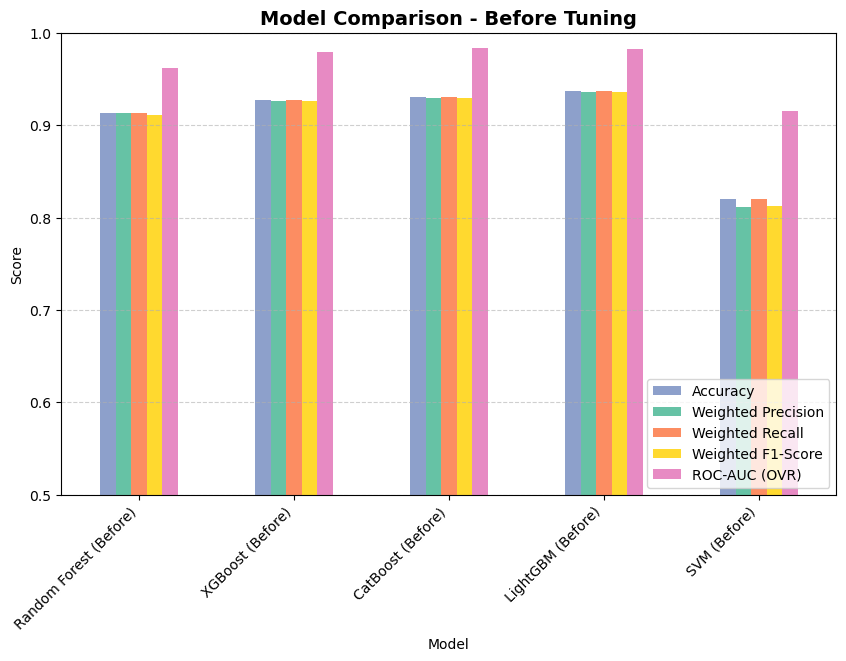

In [342]:
# Before tuning only
before_df = final_results_df[final_results_df['Model'].str.contains('Before')]
before_df.set_index('Model')[['Accuracy','Weighted Precision','Weighted Recall','Weighted F1-Score','ROC-AUC (OVR)']].plot(
    kind='bar', figsize=(10,6), color=['#8da0cb', '#66c2a5', '#fc8d62', '#ffd92f', '#e78ac3']
)
plt.title("Model Comparison - Before Tuning", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0.5, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Before hyperparameter tuning, LightGBM and CatBoost clearly emerged as the strongest performers with the highest accuracies (0.93–0.937) and near-perfect ROC-AUC (0.982–0.983), followed closely by XGBoost which also showed strong, stable performance (accuracy 0.927, ROC-AUC 0.979). Random Forest performed reliably with balanced metrics but slightly lower accuracy (0.913), while SVM performed the weakest (accuracy ~0.82) and struggled with multiclass prediction, making boosting-based models the most suitable choices before tuning.

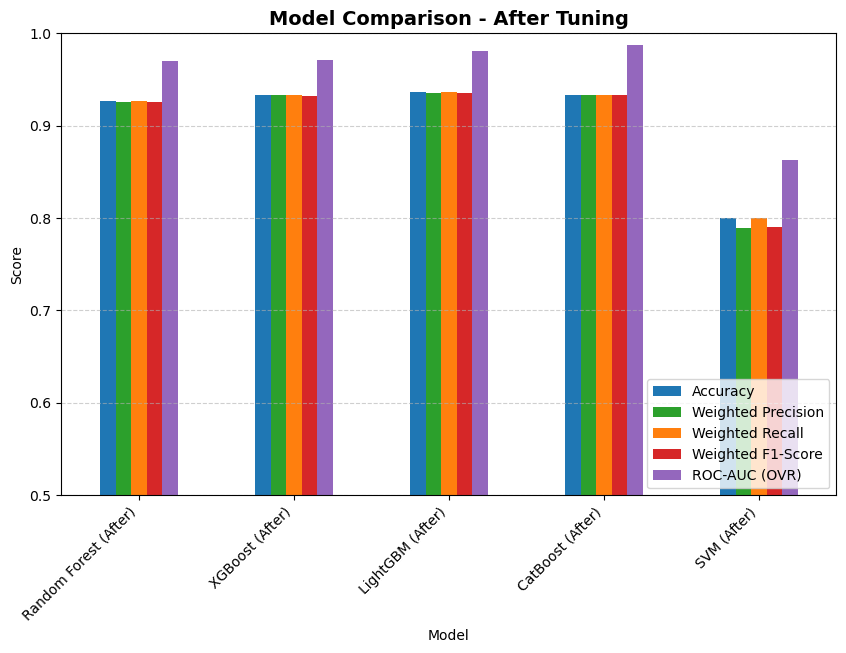

In [344]:
# After tuning only
after_df = final_results_df[final_results_df['Model'].str.contains('After')]
after_df.set_index('Model')[['Accuracy','Weighted Precision','Weighted Recall','Weighted F1-Score','ROC-AUC (OVR)']].plot(
    kind='bar', figsize=(10,6), color=['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']
)
plt.title("Model Comparison - After Tuning", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0.5, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

After tuning, all boosting models (LightGBM, CatBoost, XGBoost) achieved excellent and nearly identical performance with high accuracy (93–94%), balanced precision–recall, and strong ROC-AUC (0.97–0.99), while Random Forest improved moderately and SVM remained the weakest.

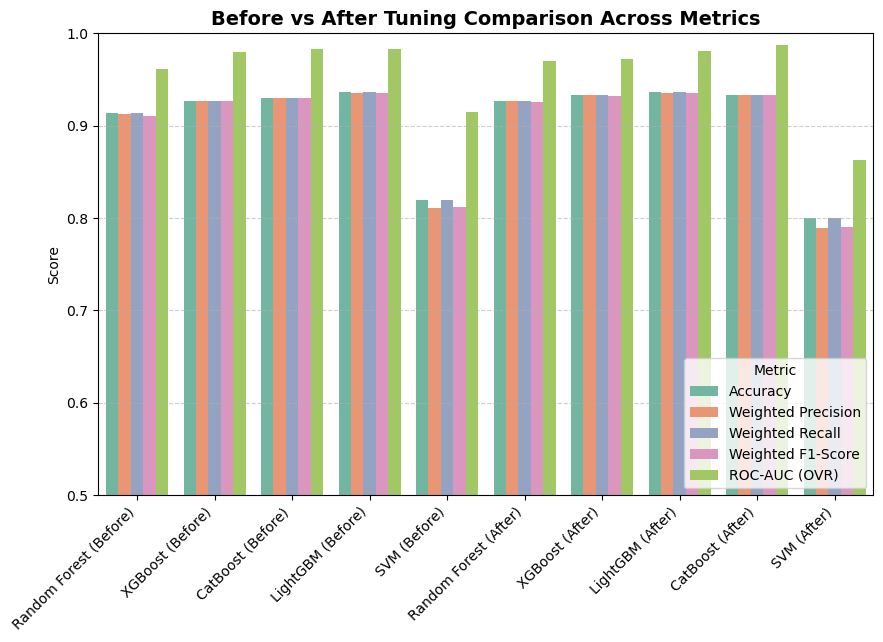

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=final_results_df.melt(id_vars='Model', value_vars=['Accuracy','Weighted Precision','Weighted Recall','Weighted F1-Score','ROC-AUC (OVR)']),
    x='Model', y='value', hue='variable', palette='Set2'
)
plt.title("Before vs After Tuning Comparison Across Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1)
plt.legend(title='Metric', loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

- LightGBM shows the strongest overall performance with the highest accuracy and balanced precision, recall, and F1-scores.
- XGBoost improves well after tuning, achieving accuracy and F1-scores almost equal to LightGBM, making it a close second performer.
- CatBoost performs consistently well both before and after tuning, showing strong stability across all metrics.
- Random Forest provides good performance after tuning, but it still remains weaker compared to boosting models.
- SVM performs noticeably worse than other models, indicating it is not suitable for this dataset.
- Boosting algorithms (LightGBM, XGBoost, CatBoost) clearly outperform traditional models, showing better handling of complex patterns.
- After tuning, most models show improvements, especially XGBoost and Random Forest, highlighting the benefit of hyperparameter optimization.
- ROC-AUC scores are highest for boosting models, suggesting they predict probabilities and class separations more effectively.
- LightGBM maintains excellent balance across classes, making it the most reliable model for predicting employee performance consistently.
- Overall, LightGBM is the best model for deployment due to its accuracy, stability, and superior performance across evaluation metrics.

**Recommendations to improve the employee performance:**
- Work-life balance is the strongest predictor of high performance.Reduce unnecessary overtime and introduce flexible working hours.Promote mental wellness and encourage taking paid leaves.
- Employees with higher salary hikes show consistently better performance ratings.Introduce a reward-based increment structure to motivate mid- and low-performing employees.Ensure increments are fairly distributed across departments.
- Environment satisfaction ranks among the top 3 importance features.Improve workplace culture, communication transparency, and recognition systems.Conduct regular surveys and act on employee feedback promptly.
- Performance drops when employees go long years without promotions.Implement clear career paths and timely promotions.Introduce internal career coaching and leadership development programs.
- Employees living far from home tend to have lower performance.Offer hybrid or remote work options where possible.Provide transport allowances or shuttle services for high-distance regions.
- Employees with low job involvement score lower in performance.Create personalized training paths and skill enhancement programs.Set measurable goals and review them quarterly.
- Enhance Manager–Employee Relationship QualityYears spent with the current manager affects performance patterns.Train managers on empathy-based leadership and constructive feedback.Encourage more one-to-one meetings and performance discussions.
-Address Underperforming Departments like Sales & Finance show relatively lower performance scores.Provide targeted training, mentorship, and streamlined workflows.Re-evaluate job expectations and KPIs for these departments.
- Provide More Yearly Training Opportunities.Training frequency is positively associated with performance.Increase the number of learning & development programs.Introduce mandatory quarterly training for low-performing units.

**Conclusion**
This project analyzed employee performance patterns, identified the most influential factors such as work-life balance, salary hikes, and environment satisfaction, and evaluated multiple machine learning models. LightGBM and CatBoost emerged as the most effective models, achieving ~94% accuracy and strong class discrimination, making them suitable for performance prediction during hiring. The insights and recommendations derived from the analysis provide actionable strategies for improving workforce satisfaction, engagement, and overall organizational performance.